In [1]:
!pip install pandas numpy matplotlib yfinance PyPortfolioOpt
import os
if not os.path.isdir('data'):
    os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
    os.chdir('PyPortfolioOpt/cookbook')

fatal: destination path 'PyPortfolioOpt' already exists and is not an empty directory.


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
tickers = ["MSFT", "AMZN", "KO", "MA", "COST", 
           "LUV", "XOM", "PFE", "JPM", "UNH", 
           "ACN", "DIS", "GILD", "F", "TSLA"]

In [4]:
ohlc = yf.download(tickers, period="max")

[*********************100%***********************]  15 of 15 completed


In [5]:
prices = ohlc["Adj Close"].dropna(how="all")
prices.tail()

,ACN,AMZN,COST,DIS,F,GILD,JPM,KO,LUV,MA,MSFT,PFE,TSLA,UNH,XOM
Date,,,,,,,,,,,,,,,
2022-04-25,316.820007,2921.479980,567.287109,119.949997,15.19,62.650002,126.769997,65.940002,46.430000,354.600006,280.720001,48.950001,998.020020,524.270020,82.260002
2022-04-26,303.100006,2787.820068,552.860535,115.769997,14.71,61.770000,123.019997,65.050003,45.020000,344.109985,270.220001,49.029999,876.419983,513.780029,82.290001
2022-04-27,303.100006,2763.340088,553.180054,115.209999,14.85,61.590000,121.419998,65.559998,45.939999,361.570007,283.220001,49.740002,881.510010,513.809998,84.639999
2022-04-28,313.839996,2891.929932,562.000000,115.290001,14.62,61.560001,123.339996,66.190002,46.900002,378.829987,289.630005,50.509998,877.510010,524.419983,87.199997
2022-04-29,300.359985,2485.629883,531.719971,111.629997,14.16,59.340000,119.360001,64.610001,46.720001,363.380005,277.519989,49.070000,870.760010,508.549988,85.250000


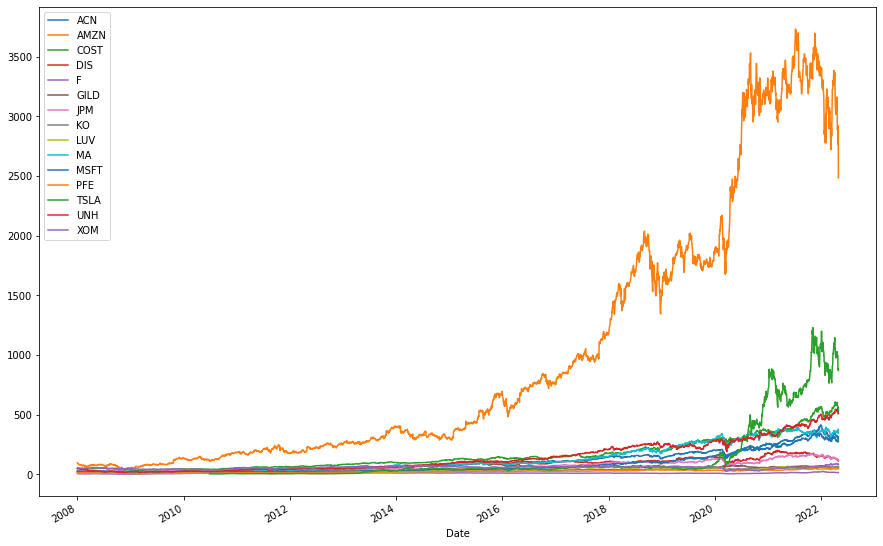

In [6]:
prices[prices.index >= "2008-01-01"].plot(figsize=(15,10));

In [7]:
import pypfopt
pypfopt.__version__

'1.5.2'

In [8]:
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov

,ACN,AMZN,COST,DIS,F,GILD,JPM,KO,LUV,MA,MSFT,PFE,TSLA,UNH,XOM
ACN,0.090520,0.044760,0.027305,0.040155,0.042678,0.028907,0.048188,0.020150,0.036269,0.045430,0.040623,0.025541,0.039632,0.030336,0.029864
AMZN,0.044760,0.332533,0.046951,0.054525,0.051321,0.058724,0.065979,0.019805,0.046998,0.055854,0.071644,0.031031,0.058501,0.034682,0.026323
COST,0.027305,0.046951,0.101110,0.031491,0.030935,0.026959,0.038419,0.020999,0.030852,0.031688,0.036920,0.025225,0.024445,0.027313,0.020196
DIS,0.040155,0.054525,0.031491,0.099321,0.040339,0.032214,0.047028,0.026073,0.039135,0.050011,0.042284,0.029278,0.038014,0.031941,0.025378
F,0.042678,0.051321,0.030935,0.040339,0.126563,0.030040,0.054461,0.026185,0.046026,0.061750,0.040804,0.026936,0.051459,0.028914,0.027497
GILD,0.028907,0.058724,0.026959,0.032214,0.030040,0.235484,0.042492,0.016614,0.030880,0.032420,0.035157,0.032477,0.031610,0.033964,0.021034
JPM,0.048188,0.065979,0.038419,0.047028,0.054461,0.042492,0.128510,0.027723,0.048922,0.069667,0.049081,0.032693,0.039157,0.038598,0.032953
KO,0.020150,0.019805,0.020999,0.026073,0.026185,0.016614,0.027723,0.053638,0.022905,0.025992,0.027655,0.026024,0.017747,0.022913,0.020638
LUV,0.036269,0.046998,0.030852,0.039135,0.046026,0.030880,0.048922,0.022905,0.138606,0.047959,0.036530,0.025807,0.037649,0.032482,0.023167
MA,0.045430,0.055854,0.031688,0.050011,0.061750,0.032420,0.069667,0.025992,0.047959,0.119132,0.048949,0.032010,0.046717,0.042904,0.041471


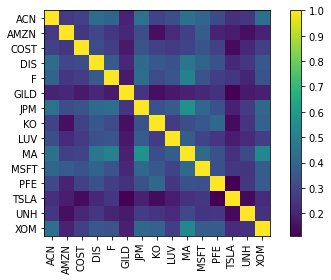

In [9]:
plotting.plot_covariance(sample_cov, plot_correlation=True);

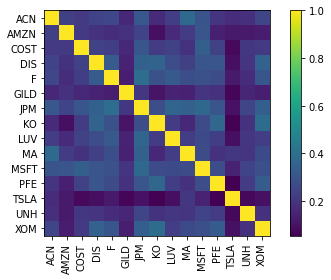

In [10]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);

In [11]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(prices)
mu

ACN     0.207838
AMZN    0.355193
COST    0.193583
DIS     0.223529
F       0.224240
GILD    0.253548
JPM     0.251695
KO      0.148027
LUV     0.227021
MA      0.260842
MSFT    0.238348
PFE     0.177864
TSLA    0.281949
UNH     0.220054
XOM     0.140949
Name: mkt, dtype: float64

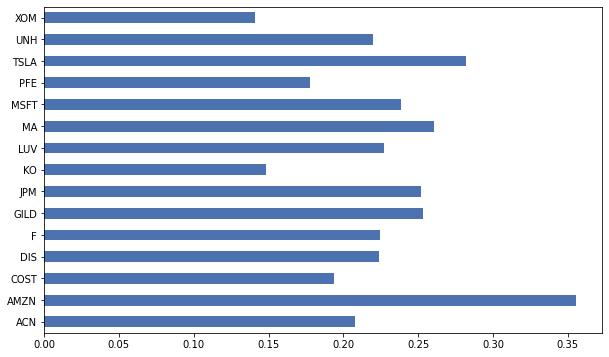

In [12]:
mu.plot.barh(figsize=(10,6));

In [13]:
from pypfopt import EfficientFrontier

In [14]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('ACN', 0.23317),
             ('AMZN', 0.00825),
             ('COST', 0.10006),
             ('DIS', -0.01749),
             ('F', -0.0177),
             ('GILD', 0.045),
             ('JPM', -0.04935),
             ('KO', 0.12682),
             ('LUV', 0.0241),
             ('MA', 0.23061),
             ('MSFT', 0.00025),
             ('PFE', 0.06672),
             ('TSLA', 0.13783),
             ('UNH', 0.0317),
             ('XOM', 0.08003)])

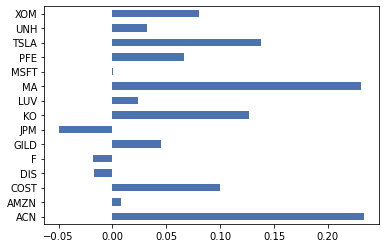

In [15]:
pd.Series(weights).plot.barh();

In [16]:
ef.portfolio_performance(verbose=True);

Annual volatility: 11.9%


In [17]:
prices

,ACN,AMZN,COST,DIS,F,GILD,JPM,KO,LUV,MA,MSFT,PFE,TSLA,UNH,XOM
Date,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,0.058398,NaN,NaN,NaN,0.050745,NaN,NaN,NaN,NaN,NaN,NaN,0.101854
1962-01-03,NaN,NaN,NaN,0.059182,NaN,NaN,NaN,0.049614,NaN,NaN,NaN,NaN,NaN,NaN,0.103367
1962-01-04,NaN,NaN,NaN,0.059182,NaN,NaN,NaN,0.049991,NaN,NaN,NaN,NaN,NaN,NaN,0.103619
1962-01-05,NaN,NaN,NaN,0.059378,NaN,NaN,NaN,0.048860,NaN,NaN,NaN,NaN,NaN,NaN,0.101350
1962-01-08,NaN,NaN,NaN,0.059182,NaN,NaN,NaN,0.048358,NaN,NaN,NaN,NaN,NaN,NaN,0.101098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,316.820007,2921.479980,567.287109,119.949997,15.19,62.650002,126.769997,65.940002,46.430000,354.600006,280.720001,48.950001,998.020020,524.270020,82.260002
2022-04-26,303.100006,2787.820068,552.860535,115.769997,14.71,61.770000,123.019997,65.050003,45.020000,344.109985,270.220001,49.029999,876.419983,513.780029,82.290001
2022-04-27,303.100006,2763.340088,553.180054,115.209999,14.85,61.590000,121.419998,65.559998,45.939999,361.570007,283.220001,49.740002,881.510010,513.809998,84.639999


In [18]:
from pypfopt import DiscreteAllocation

latest_prices = prices.iloc[-1]  # prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=20000, short_ratio=0.3)
alloc, leftover = da.lp_portfolio()
print(f"Discrete allocation performed with ${leftover:.2f} leftover")
alloc

Discrete allocation performed with $69.13 leftover


{'ACN': 14,
 'COST': 4,
 'GILD': 14,
 'KO': 36,
 'LUV': 9,
 'MA': 12,
 'PFE': 25,
 'TSLA': 3,
 'UNH': 1,
 'XOM': 16,
 'DIS': -11,
 'F': -89,
 'JPM': -29}

In [19]:
sector_mapper = {
    "MSFT": "Tech",
    "AMZN": "Consumer Discretionary",
    "KO": "Consumer Staples",
    "MA": "Financial Services",
    "COST": "Consumer Staples",
    "LUV": "Aerospace",
    "XOM": "Energy",
    "PFE": "Healthcare",
    "JPM": "Financial Services",
    "UNH": "Healthcare",
    "ACN": "Misc",
    "DIS": "Media",
    "GILD": "Healthcare",
    "F": "Auto",
    "TSLA": "Auto"
}

sector_lower = {
    "Consumer Staples": 0.1, # at least 10% to staples
    "Tech": 0.05 # at least 5% to tech
    # For all other sectors, it will be assumed there is no lower bound
}

sector_upper = {
    "Tech": 0.2,
    "Aerospace":0.1,
    "Energy": 0.1,
    "Auto":0.15
}

In [20]:
mu = expected_returns.capm_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(mu, S)  # weight_bounds automatically set to (0, 1)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)

amzn_index = ef.tickers.index("AMZN")
ef.add_constraint(lambda w: w[amzn_index] == 0.10)

tsla_index = ef.tickers.index("TSLA")
ef.add_constraint(lambda w: w[tsla_index] <= 0.05)

ef.add_constraint(lambda w: w[10] >= 0.05)

ef.max_sharpe()
weights = ef.clean_weights()

In [21]:
weights

OrderedDict([('ACN', 0.16986),
             ('AMZN', 0.1),
             ('COST', 0.0555),
             ('DIS', 0.0),
             ('F', 0.0),
             ('GILD', 0.06284),
             ('JPM', 0.0),
             ('KO', 0.0445),
             ('LUV', 0.0225),
             ('MA', 0.38406),
             ('MSFT', 0.05),
             ('PFE', 0.02633),
             ('TSLA', 0.05),
             ('UNH', 0.03441),
             ('XOM', 0.0)])

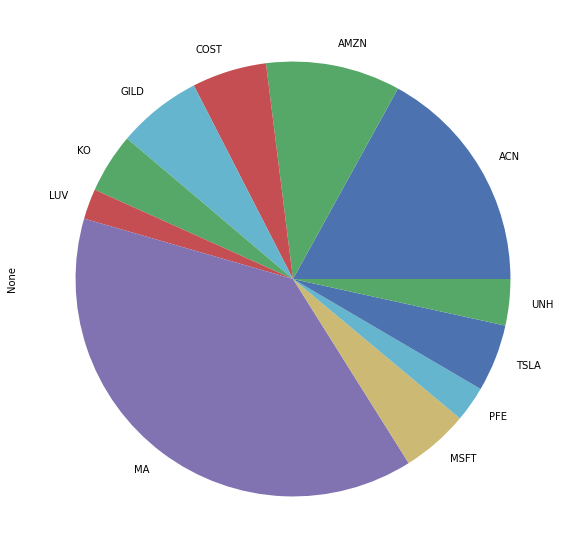

In [22]:
pd.Series(weights).plot.pie(figsize=(10,10));

In [23]:
# O(N^2) loop not a good idea in a coding interview :)
for sector in set(sector_mapper.values()):
    total_weight = 0
    for t,w in weights.items():
        if sector_mapper[t] == sector:
            total_weight += w
    print(f"{sector}: {total_weight:.3f}")

Energy: 0.000
Misc: 0.170
Healthcare: 0.124
Consumer Discretionary: 0.100
Financial Services: 0.384
Consumer Staples: 0.100
Media: 0.000
Auto: 0.050
Aerospace: 0.022
Tech: 0.050


In [24]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.efficient_risk(target_volatility=0.15)
weights = ef.clean_weights()
weights

OrderedDict([('ACN', 0.0),
             ('AMZN', 0.1802),
             ('COST', 0.1),
             ('DIS', 0.0),
             ('F', 0.0),
             ('GILD', 0.06467),
             ('JPM', 0.0),
             ('KO', 0.0),
             ('LUV', 0.0),
             ('MA', 0.44998),
             ('MSFT', 0.05),
             ('PFE', 0.0),
             ('TSLA', 0.15),
             ('UNH', 0.00515),
             ('XOM', 0.0)])

In [25]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")

8/15 tickers have zero weight


In [26]:
ef.portfolio_performance(verbose=True);

Expected annual return: 27.2%
Annual volatility: 15.0%
Sharpe Ratio: 1.68


In [27]:
from pypfopt import objective_functions

# You must always create a new efficient frontier object
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # gamme is the tuning parameter
ef.efficient_risk(0.15)
weights = ef.clean_weights()
weights

OrderedDict([('ACN', 0.05063),
             ('AMZN', 0.20067),
             ('COST', 0.08722),
             ('DIS', 0.01436),
             ('F', 0.0),
             ('GILD', 0.08208),
             ('JPM', 0.04623),
             ('KO', 0.01278),
             ('LUV', 0.03111),
             ('MA', 0.23974),
             ('MSFT', 0.05),
             ('PFE', 0.0),
             ('TSLA', 0.15),
             ('UNH', 0.03519),
             ('XOM', 0.0)])

In [28]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")

3/15 tickers have zero weight


In [29]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=1)  # gamme is the tuning parameter
ef.efficient_risk(0.15)
weights = ef.clean_weights()
weights

OrderedDict([('ACN', 0.05588),
             ('AMZN', 0.12956),
             ('COST', 0.06139),
             ('DIS', 0.06372),
             ('F', 0.06057),
             ('GILD', 0.07873),
             ('JPM', 0.07781),
             ('KO', 0.03861),
             ('LUV', 0.06547),
             ('MA', 0.08238),
             ('MSFT', 0.07113),
             ('PFE', 0.04089),
             ('TSLA', 0.08943),
             ('UNH', 0.06199),
             ('XOM', 0.02243)])

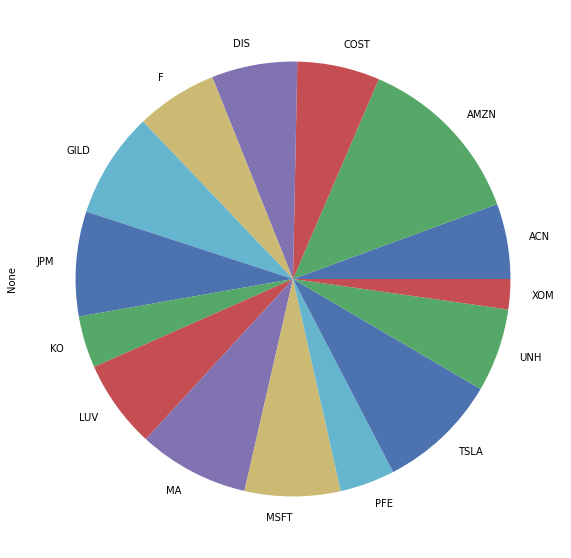

In [30]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [31]:
ef.portfolio_performance(verbose=True);


Expected annual return: 24.5%
Annual volatility: 14.9%
Sharpe Ratio: 1.51


In [32]:
# Must have no weight bounds to allow shorts
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_objective(objective_functions.L2_reg)
ef.efficient_return(target_return=0.07, market_neutral=True)
weights = ef.clean_weights()
weights

OrderedDict([('ACN', -0.03658),
             ('AMZN', 0.21969),
             ('COST', -0.06111),
             ('DIS', -0.00253),
             ('F', -0.00268),
             ('GILD', 0.04529),
             ('JPM', 0.04628),
             ('KO', -0.14107),
             ('LUV', 0.00129),
             ('MA', 0.06374),
             ('MSFT', 0.02043),
             ('PFE', -0.08612),
             ('TSLA', 0.09972),
             ('UNH', -0.01039),
             ('XOM', -0.15596)])

In [33]:
ef.portfolio_performance(verbose=True);

Expected annual return: 7.0%
Annual volatility: 10.7%
Sharpe Ratio: 0.47


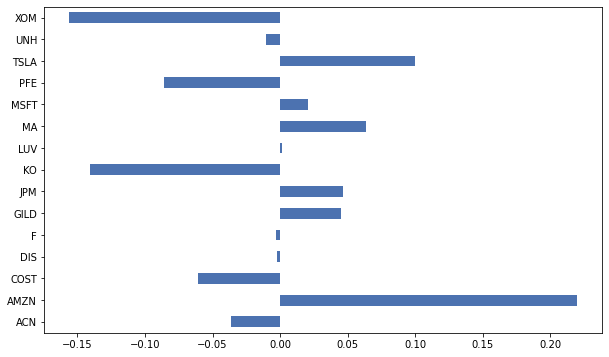

In [34]:
pd.Series(weights).plot.barh(figsize=(10,6));

In [35]:
print(f"Net weight: {sum(weights.values()):.2f}")

Net weight: 0.00


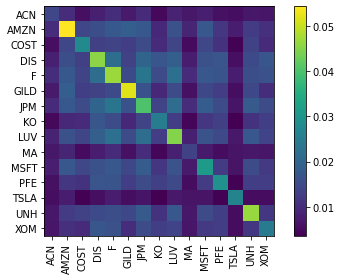

In [36]:
semicov = risk_models.semicovariance(prices, benchmark=0)
plotting.plot_covariance(semicov);

In [37]:
ef = EfficientFrontier(mu, semicov)
ef.efficient_return(0.2)
weights = ef.clean_weights()
weights

OrderedDict([('ACN', 0.25679),
             ('AMZN', 0.0),
             ('COST', 0.08959),
             ('DIS', 0.0),
             ('F', 0.0),
             ('GILD', 0.01066),
             ('JPM', 0.0),
             ('KO', 0.13504),
             ('LUV', 0.0),
             ('MA', 0.3067),
             ('MSFT', 0.0),
             ('PFE', 0.04854),
             ('TSLA', 0.13866),
             ('UNH', 0.0),
             ('XOM', 0.01403)])

In [38]:
ef.portfolio_performance(verbose=True);

Expected annual return: 22.3%
Annual volatility: 9.0%
Sharpe Ratio: 2.25


In [39]:
returns = expected_returns.returns_from_prices(prices)
returns = returns.dropna()

In [40]:
from pypfopt import EfficientSemivariance

es = EfficientSemivariance(mu, returns)
es.efficient_return(0.2)
es.portfolio_performance(verbose=True);

Expected annual return: 20.0%
Annual semi-deviation: 10.2%
Sortino Ratio: 1.76


In [41]:
es.weights = ef.weights
es.portfolio_performance(verbose=True);

Expected annual return: 22.3%
Annual semi-deviation: 14.0%
Sortino Ratio: 1.45


In [42]:
returns = expected_returns.returns_from_prices(prices).dropna()
returns.head()

,ACN,AMZN,COST,DIS,F,GILD,JPM,KO,LUV,MA,MSFT,PFE,TSLA,UNH,XOM
Date,,,,,,,,,,,,,,,
2010-06-30,0.000000,0.005985,-0.014381,-0.024768,0.020242,-0.019732,-0.012142,-0.004172,0.000000,-0.017045,-0.012870,-0.001401,-0.002512,-0.008034,-0.003840
2010-07-01,-0.009573,0.015559,0.001277,-0.000317,0.048611,-0.004084,-0.013129,-0.001796,-0.010801,0.016652,0.006519,-0.002104,-0.078472,-0.019366,-0.008060
2010-07-02,-0.008882,-0.016402,-0.012204,-0.003493,-0.027436,0.021383,-0.006929,0.000400,-0.021838,0.000345,0.004750,-0.006324,-0.125683,0.016158,-0.000706
2010-07-06,0.012388,0.008430,-0.004242,0.010835,-0.011673,-0.002868,0.013955,0.007592,-0.011163,-0.013513,0.023635,0.010608,-0.160938,0.020848,0.015732
2010-07-07,0.022129,0.030620,0.005371,0.044767,0.042323,0.004889,0.050096,0.020623,0.062088,0.037694,0.020151,0.023093,-0.019243,0.010731,0.016882


In [43]:
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weight_arr = ef.weights
ef.portfolio_performance(verbose=True);

Expected annual return: 25.2%
Annual volatility: 13.0%
Sharpe Ratio: 1.79


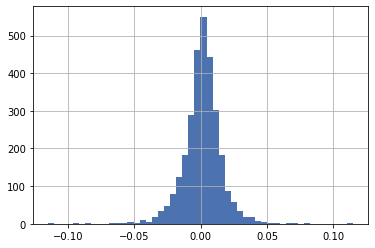

In [44]:
# Compute CVaR
portfolio_rets = (returns * weight_arr).sum(axis=1)
portfolio_rets.hist(bins=50);

In [45]:
# VaR
var = portfolio_rets.quantile(0.05)
cvar = portfolio_rets[portfolio_rets <= var].mean()
print("VaR: {:.2f}%".format(100*var))
print("CVaR: {:.2f}%".format(100*cvar))

VaR: -2.18%
CVaR: -3.27%


In [46]:
from pypfopt import EfficientCVaR

ec = EfficientCVaR(mu, returns)
ec.min_cvar()
ec.portfolio_performance(verbose=True);

Expected annual return: 17.7%
Conditional Value at Risk: 2.12%


In [47]:
from pypfopt import EfficientCVaR

ec = EfficientCVaR(mu, returns)
ec.efficient_risk(target_cvar=0.025)
ec.portfolio_performance(verbose=True);

Expected annual return: 24.4%
Conditional Value at Risk: 2.50%


In [48]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 24.9%
Annual volatility: 12.8%
Sharpe Ratio: 1.78


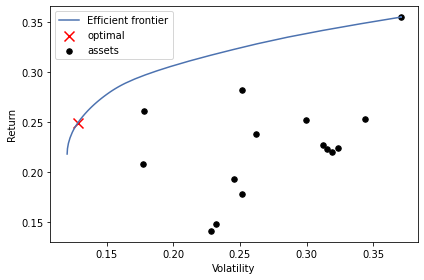

In [49]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

In [50]:
import cvxpy as cp

mu = expected_returns.capm_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(mu, S,)
big_tech_indices = [t in {"MSFT", "AMZN", "TSLA"} for t in tickers]
ef.add_constraint(lambda w: cp.sum(w[big_tech_indices]) <= 0.3)

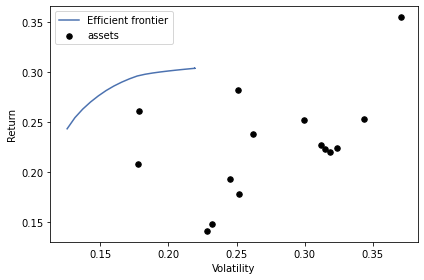

In [51]:
ax = plotting.plot_efficient_frontier(ef, ef_param="risk", 
                                      ef_param_range=np.linspace(0.12, 0.4, 50), 
                                      showfig=False);

In [52]:
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

print("Sample portfolio returns:", rets)
print("Sample portfolio volatilities:", stds)

Sample portfolio returns: [0.2514814  0.22743843 0.21223513 ... 0.22327747 0.24020786 0.22558189]
Sample portfolio volatilities: 0       0.148618
1       0.155484
2       0.151732
3       0.160307
4       0.163019
          ...   
9995    0.148045
9996    0.164507
9997    0.164247
9998    0.168758
9999    0.161577
Length: 10000, dtype: float64


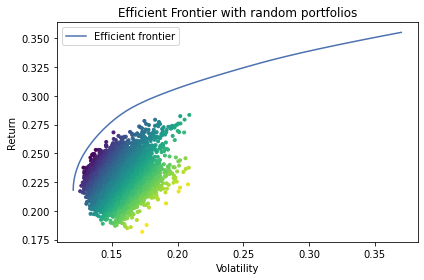

In [53]:
# Plot efficient frontier with Monte Carlo sim
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu, S)
ef2.max_sharpe()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()